In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')


In [3]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784



```
Attribute Information:

date time year-month-day hour:minute:second
Appliances, energy use in Wh
lights, energy use of light fixtures in the house in Wh
T1, Temperature in kitchen area, in Celsius
RH_1, Humidity in kitchen area, in %
T2, Temperature in living room area, in Celsius
RH_2, Humidity in living room area, in %
T3, Temperature in laundry room area
RH_3, Humidity in laundry room area, in %
T4, Temperature in office room, in Celsius
RH_4, Humidity in office room, in %
T5, Temperature in bathroom, in Celsius
RH_5, Humidity in bathroom, in %
T6, Temperature outside the building (north side), in Celsius
RH_6, Humidity outside the building (north side), in %
T7, Temperature in ironing room , in Celsius
RH_7, Humidity in ironing room, in %
T8, Temperature in teenager room 2, in Celsius
RH_8, Humidity in teenager room 2, in %
T9, Temperature in parents room, in Celsius
RH_9, Humidity in parents room, in %
To, Temperature outside (from Chievres weather station), in Celsius
Pressure (from Chievres weather station), in mm Hg
RH_out, Humidity outside (from Chievres weather station), in %
Wind speed (from Chievres weather station), in m/s
Visibility (from Chievres weather station), in km
Tdewpoint (from Chievres weather station), Â°C
rv1, Random variable 1, nondimensional
rv2, Random variable 2, nondimensional

```

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format = True)

<ipython-input-5-454d568d8d09>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'], infer_datetime_format = True)


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

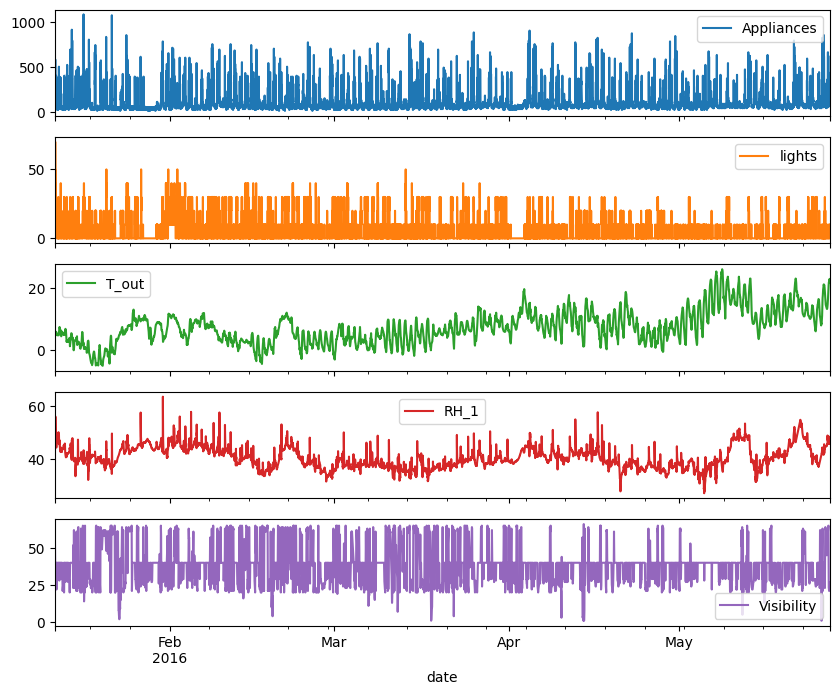

In [6]:
df.set_index('date')[['Appliances', 'lights', 'T_out', 'RH_1', 'Visibility']].plot(subplots = True)

In [7]:
df_input=df[['Appliances','T_out', 'RH_1', 'Visibility']]


In [8]:
df_input.isnull().sum()

Appliances    0
T_out         0
RH_1          0
Visibility    0
dtype: int64

In [9]:
df_input.describe()

,Appliances,T_out,RH_1,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,7.411665,40.259739,38.330834
std,102.524891,5.317409,3.979299,11.794719
min,10.000000,-5.000000,27.023333,1.000000
25%,50.000000,3.666667,37.333333,29.000000
50%,60.000000,6.916667,39.656667,40.000000
75%,100.000000,10.408333,43.066667,40.000000
max,1080.000000,26.100000,63.360000,66.000000


In [10]:
df_input.query('Appliances > 500')

,Appliances,T_out,RH_1,Visibility
11,580,5.983333,46.396667,40.000000
314,520,2.900000,41.530000,36.333333
392,550,2.033333,43.433333,40.000000
393,690,2.100000,43.766667,40.000000
394,620,2.166667,43.693333,40.000000
...,...,...,...,...
19586,600,20.833333,44.066667,40.000000
19587,520,20.900000,43.366667,40.000000
19684,580,15.900000,47.226667,61.000000
19685,660,16.100000,47.693333,61.000000


In [11]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [12]:
data_scaled

array([[0.04672897, 0.37299035, 0.56618659, 0.95384615],
       [0.04672897, 0.36923901, 0.54132648, 0.89487179],
       [0.03738318, 0.36548767, 0.53050179, 0.83589744],
       ...,
       [0.24299065, 0.88317256, 0.53866618, 0.37435897],
       [0.38317757, 0.87888532, 0.54949087, 0.38717949],
       [0.39252336, 0.87459807, 0.53875791, 0.4       ]])

In [13]:
# KINDA WIERD, BUT RIGHT NOW THE "APPLIANCE" IS IN BOTH THE FEATURE AND TARGET. That basically tells, we will be learning
# from the past usage of appliance and predicting the future usage
features = data_scaled
target = data_scaled[:,0]

In [14]:
TimeseriesGenerator(features, target, length = 2, sampling_rate = 1, batch_size = 1)

In [15]:
TimeseriesGenerator(features, target, length = 2, sampling_rate = 1, batch_size = 1)[0]

(array([[[0.04672897, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.36923901, 0.54132648, 0.89487179]]]),
 array([0.03738318]))

In [16]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42, shuffle = False)

In [17]:
x_train.shape

(15788, 4)

In [18]:
y_train.shape

(15788,)

In [19]:
x_test.shape

(3947, 4)

#### NOTE:
defining a window length (win_length) for 5 days period. We have data for every 10 minutes so that will give 6 data points in 1 hrs, which will result to 6 * 24 =  144 (in one day) and 720 for 5 days.

In [20]:
win_length = 720
batch_size = 32
num_features = 4

train_generator = TimeseriesGenerator(x_train, y_train, length = win_length, sampling_rate = 1, batch_size = batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length = win_length, sampling_rate = 1, batch_size = batch_size)


In [21]:
train_generator[0]

(array([[[0.04672897, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.36548767, 0.53050179, 0.83589744],
         ...,
         [0.06542056, 0.25241158, 0.31584258, 0.79230769],
         [0.05607477, 0.23901393, 0.31309054, 0.72820513],
         [0.06542056, 0.22561629, 0.31107238, 0.66410256]],
 
        [[0.04672897, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.36173633, 0.52408036, 0.77692308],
         ...,
         [0.05607477, 0.23901393, 0.31309054, 0.72820513],
         [0.06542056, 0.22561629, 0.31107238, 0.66410256],
         [0.06542056, 0.21221865, 0.30923768, 0.6       ]],
 
        [[0.03738318, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.36173633, 0.52408036, 0.77692308],
         [0.04672897, 0.35798499, 0.53141914, 0.71794872],
         ...,
         [0.06542056, 0.22561629, 0.31107238, 0.66410256],
        

In [22]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(128, input_shape = (win_length, num_features), return_sequences = True))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences = True))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64, return_sequences = False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))



### NOTE:
model.add(tf.keras.layers.LSTM(128, input_shape = (win_length, num_features), return_sequences = True))

The return_sequences is set to True here, because we have a time series data, and we want to return the appliance usage for each input. In the the last LSTM layer, we set the return_sequence to False, and then set the Dense output to 1, so that, we get the final output for next hour.


1. **Input Layer**:
   - Input shape: `(win_length, num_features)`. This indicates that the model expects input sequences with a length of `win_length` and `num_features` features per time step.

2. **First LSTM Layer**:
   - `return_sequences=True`: This means that this LSTM layer will output a sequence rather than just a single output for the whole input sequence. This is often used when stacking multiple recurrent layers on top of each other.
   - `LeakyReLU(alpha=0.5)`: Leaky ReLU activation function with a small slope for negative inputs, helping to alleviate the vanishing gradient problem.
   
3. **Second LSTM Layer**:
   - Similar to the first LSTM layer, it also returns sequences.

4. **Dropout Layer**:
   - Applied to the output of the second LSTM layer, helping to regularize the model and prevent overfitting.

5. **Third LSTM Layer**:
   - `return_sequences=False`: Unlike the first two layers, this layer doesn't return sequences; it returns only the output of the last time step. This is often used when you want the LSTM layers to act as a sequence encoder, summarizing the input sequence into a fixed-size vector representation.
   - `Dropout(0.3)`: Dropout regularization applied to the output of this LSTM layer.

6. **Dense Layer**:
   - A fully connected layer with one neuron, typically used for regression tasks where the model predicts a single output value.

The gradual reduction of sequence output from `return_sequences=True` to `return_sequences=False` is a common pattern. The initial layers capture temporal dependencies across the input sequence, while the final layer aggregates this information into a fixed-size representation suitable for the final prediction. The dropout layers help prevent overfitting by randomly dropping connections during training.


The reason for setting `return_sequences=True` in the first two LSTM layers and then `return_sequences=False` in the final LSTM layer is a common pattern in sequence-to-sequence models. The first two layers process sequences and pass them along, while the final layer condenses the information into a single output. The dropout layers help prevent overfitting by randomly dropping connections during training.

This architecture is often used for processing sequential data, where the model needs to understand and capture temporal dependencies within the data.

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 720, 128)          68096     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 720, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 720, 128)          131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 dropout (Dropout)           (None, 720, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

### NOTE: Understanding the number of parameters
In LSTM, the number of units (connections) from the previous layer also goes an the input, so

    `the total input = number of units + input size`

With this we follow the machine learning architecture where
    
    `total parameters =  number of neurons (units or connection) * input size + bias (= number of neurons)

So, for each LSTM gate, we have

    `number of parameters = total input * number of units + number of units`

Overall for 4 gates, we have
   
    $number of parameters  = 4 * [total input * number of units + number of units]$
    
    $number of parameters  = 4 * [(number of units + input size) * number of units + number of units]$
    
    
                                            

In [24]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience = 2,
                                                  mode = 'min')

model.compile(loss = tf.losses.MeanSquaredError(),
              optimizer = tf.optimizers.Adam(),
              metrics = [tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator, epochs = 50,
                              validation_data = test_generator,
                              shuffle = False,
                              callbacks = [early_stopping])

Epoch 1/50


<ipython-input-24-62bce8ebe016>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs = 50,


471/471 [==============================] - 44s 76ms/step - loss: 0.0085 - mean_absolute_error: 0.0510 - val_loss: 0.0057 - val_mean_absolute_error: 0.0487
Epoch 2/50
471/471 [==============================] - 32s 68ms/step - loss: 0.0067 - mean_absolute_error: 0.0429 - val_loss: 0.0045 - val_mean_absolute_error: 0.0395
Epoch 3/50
471/471 [==============================] - 36s 76ms/step - loss: 0.0048 - mean_absolute_error: 0.0350 - val_loss: 0.0033 - val_mean_absolute_error: 0.0305
Epoch 4/50
471/471 [==============================] - 33s 70ms/step - loss: 0.0042 - mean_absolute_error: 0.0318 - val_loss: 0.0032 - val_mean_absolute_error: 0.0269
Epoch 5/50
471/471 [==============================] - 33s 69ms/step - loss: 0.0041 - mean_absolute_error: 0.0312 - val_loss: 0.0032 - val_mean_absolute_error: 0.0304
Epoch 6/50
471/471 [==============================] - 32s 68ms/step - loss: 0.0040 - mean_absolute_error: 0.0309 - val_loss: 0.0032 - val_mean_absolute_error: 0.0278
Epoch 7/50
471/

In [25]:
model.evaluate_generator(test_generator, verbose = 0)

<ipython-input-25-e696f7633c23>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose = 0)


[0.0031972723081707954, 0.02905760519206524]

In [26]:
predictions = model.predict_generator(test_generator)

<ipython-input-26-9068eb02ed61>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


In [27]:
predictions.shape[0]

3227

In [28]:
y_test

array([0.3364486 , 0.54205607, 0.28971963, ..., 0.24299065, 0.38317757,
       0.39252336])

In [29]:
x_test

array([[0.3364486 , 0.34297964, 0.30923768, 0.6       ],
       [0.54205607, 0.34726688, 0.3055683 , 0.6       ],
       [0.28971963, 0.35155413, 0.30455921, 0.6       ],
       ...,
       [0.24299065, 0.88317256, 0.53866618, 0.37435897],
       [0.38317757, 0.87888532, 0.54949087, 0.38717949],
       [0.39252336, 0.87459807, 0.53875791, 0.4       ]])

In [30]:
# because prediction will not have output for first win_length of data
x_test[:, 1:][win_length:]

array([[0.45337621, 0.20851298, 0.6       ],
       [0.47106109, 0.18282726, 0.6       ],
       [0.48874598, 0.18466196, 0.6       ],
       ...,
       [0.88317256, 0.53866618, 0.37435897],
       [0.87888532, 0.54949087, 0.38717949],
       [0.87459807, 0.53875791, 0.4       ]])

In [31]:
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [32]:
df_pred

,0,0,1,2
0,0.074410,0.453376,0.208513,0.600000
1,0.097080,0.471061,0.182827,0.600000
2,0.120865,0.488746,0.184662,0.600000
3,0.330092,0.506431,0.193996,0.600000
4,0.153397,0.524116,0.181818,0.600000
...,...,...,...,...
3222,0.091652,0.891747,0.537657,0.348718
3223,0.104227,0.887460,0.536006,0.361538
3224,0.093360,0.883173,0.538666,0.374359
3225,0.247732,0.878885,0.549491,0.387179


In [33]:
rev_trans = scaler.inverse_transform(df_pred)

In [34]:
rev_trans

array([[ 89.61856335,   9.1       ,  34.6       ,  40.        ],
       [113.87587078,   9.65      ,  33.66666667,  40.        ],
       [139.32548866,  10.2       ,  33.73333333,  40.        ],
       ...,
       [109.89473693,  22.46666667,  46.59666667,  25.33333333],
       [275.07287174,  22.33333333,  46.99      ,  26.16666667],
       [294.73068774,  22.2       ,  46.6       ,  27.        ]])

In [35]:
df_final = df_input[predictions.shape[0]*-1:]

In [36]:
df_final.count()

Appliances    3227
T_out         3227
RH_1          3227
Visibility    3227
dtype: int64

In [37]:
df_final['App_Pred'] = rev_trans[:,0]

<ipython-input-37-bf702c672f48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['App_Pred'] = rev_trans[:,0]


In [38]:
df_final

,Appliances,T_out,RH_1,Visibility,App_Pred
16508,90,9.100000,34.600000,40.000000,89.618563
16509,120,9.650000,33.666667,40.000000,113.875871
16510,390,10.200000,33.733333,40.000000,139.325489
16511,240,10.750000,34.072500,40.000000,363.197944
16512,120,11.300000,33.630000,40.000000,174.134353
...,...,...,...,...,...
19730,100,22.733333,46.560000,23.666667,108.067152
19731,90,22.600000,46.500000,24.500000,121.523375
19732,270,22.466667,46.596667,25.333333,109.894737
19733,420,22.333333,46.990000,26.166667,275.072872


<Axes: >

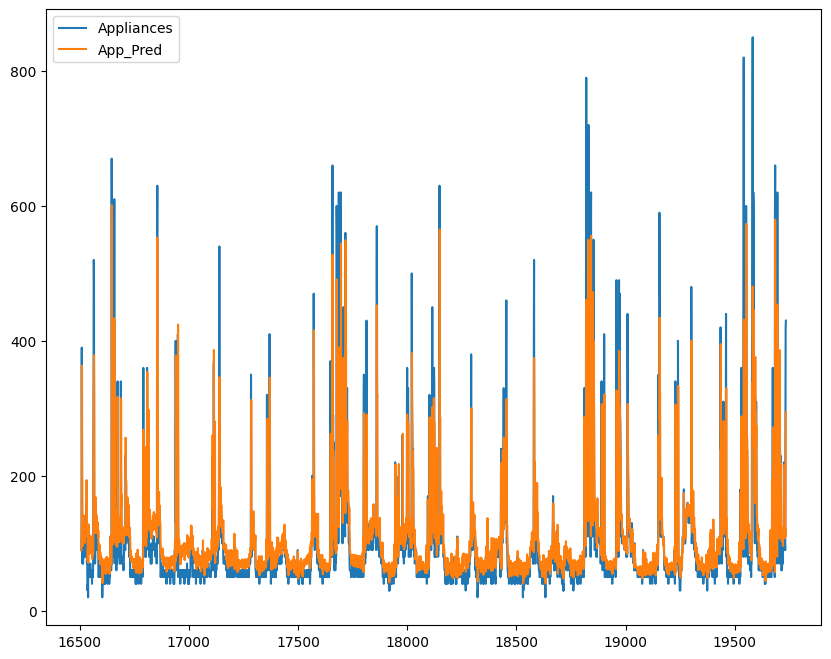

In [39]:
df_final[['Appliances','App_Pred']].plot()